In [21]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

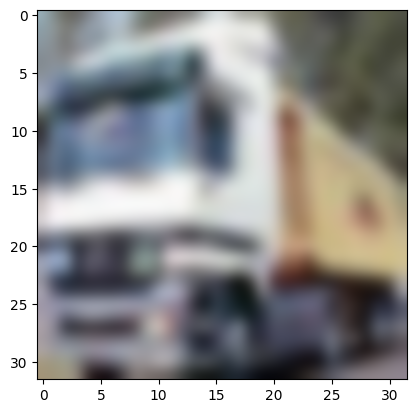

In [23]:
image = X_train[1]
plt.imshow(image, interpolation = 'bicubic')
plt.show()

In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [26]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [27]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [28]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
modelo = Sequential()

modelo.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
modelo.add(Conv2D(32, (3, 3), activation = 'relu'))
modelo.add(MaxPooling2D(pool_size = (2, 2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
modelo.add(Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(MaxPooling2D(pool_size = (2, 2)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation = 'relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(10, activation = 'softmax'))

In [31]:
modelo.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
modelo.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 11s 5ms/step - loss: 0.4682 - accuracy: 0.8349
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4433 - accuracy: 0.8450
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4191 - accuracy: 0.8512
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3981 - accuracy: 0.8589
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3857 - accuracy: 0.8637
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3734 - accuracy: 0.8689
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3586 - accuracy: 0.8724
Epoch 8/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3374 - accuracy: 0.8823
Epoch 9/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3317 - accuracy: 0.8835
Epoch 10/100
1563/1563 [==============================] - 9s 6ms/step - 

In [32]:
previsoes = modelo.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [33]:
previsoes

array([[4.7907761e-06, 4.1293573e-09, 1.2885779e-04, ..., 3.6974572e-07,
        8.8261237e-04, 1.4708603e-09],
       [4.0577605e-04, 9.0975726e-01, 1.5725202e-14, ..., 2.7540128e-13,
        8.9830957e-02, 5.9757085e-06],
       [4.2891543e-02, 3.8532398e-04, 2.8035187e-04, ..., 3.7604537e-09,
        9.5604420e-01, 3.4486502e-04],
       ...,
       [7.7846711e-16, 4.1717104e-19, 1.0946607e-05, ..., 6.1006609e-09,
        2.8123877e-14, 2.2256138e-14],
       [6.4780980e-01, 1.4216718e-01, 2.5149325e-06, ..., 4.1181151e-12,
        1.1739087e-05, 1.2399744e-06],
       [1.1596628e-21, 7.6066686e-24, 9.1461464e-16, ..., 1.0000000e+00,
        1.5305869e-23, 1.2961517e-22]], dtype=float32)

In [34]:
previsoes_classes = np.argmax(previsoes, axis = 1)
previsoes_classes

array([3, 1, 8, ..., 5, 0, 7])

In [35]:
y_test_classes = np.argmax(y_test, axis = 1)

In [36]:
y_test_classes

array([3, 8, 8, ..., 5, 1, 7])

In [37]:
accuracy = accuracy_score(y_test_classes, previsoes_classes)
accuracy

0.7832

In [38]:
confusion = confusion_matrix(y_test_classes, previsoes_classes)

In [39]:
confusion

array([[836,  17,  23,  11,  19,   4,  11,   2,  48,  29],
       [ 13, 903,   3,   5,   2,   3,   6,   1,  17,  47],
       [ 63,   5, 660,  42,  62,  63,  72,  16,  11,   6],
       [ 25,   6,  47, 561,  55, 160, 100,  22,  14,  10],
       [ 14,   3,  35,  48, 775,  20,  57,  37,   8,   3],
       [ 11,   4,  31, 134,  46, 692,  37,  34,   3,   8],
       [  9,   1,  23,  22,  23,  12, 891,   3,   9,   7],
       [ 11,   4,  17,  42,  47,  46,  15, 803,   6,   9],
       [ 45,  20,   6,  15,   7,   2,   6,   2, 881,  16],
       [ 25,  83,   2,   7,   6,   5,   6,   6,  30, 830]])